# Predicting Movie Revenue based on IMDb Data 


The propose of this system is to predict the movie box office gross level in U.S. for movie investors before filming. They can use this system to adjust budget, cast and movie genre to optimize the movie box office gross.

In [205]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as geek 
import pickle
from sklearn.preprocessing import LabelEncoder


import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDRegressor


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

from sklearn import linear_model# compute classification accuracy for the linear regression model
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
from sklearn import utils

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

In [206]:
#Read data file from panda

imdb= pd.read_csv('/Users/madhuridilipkumar/Desktop/movie.csv')

#filling the missing values in the class lable using interpolate
imdb.gross = imdb.gross.interpolate(method ="linear")
imdb

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0,855.0,Joel David Moore,1000.0,7.605058e+08,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563,1000.0,Orlando Bloom,40000.0,3.094042e+08,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0,161.0,Rory Kinnear,11000.0,2.000742e+08,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000,23000.0,Christian Bale,27000.0,4.481306e+08,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475,530.0,Samantha Morton,640.0,7.305868e+07,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012,632.0,6.6,2.35,24000
5,Color,Sam Raimi,392.0,156.0,0,4000.0,James Franco,24000.0,3.365303e+08,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007,11000.0,6.2,2.35,0
6,Color,Nathan Greno,324.0,100.0,15,284.0,Donna Murphy,799.0,2.008073e+08,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010,553.0,7.8,1.85,29000
7,Color,Joss Whedon,635.0,141.0,0,19000.0,Robert Downey Jr.,26000.0,4.589916e+08,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015,21000.0,7.5,2.35,118000
8,Color,David Yates,375.0,153.0,282,10000.0,Daniel Radcliffe,25000.0,3.019570e+08,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009,11000.0,7.5,2.35,10000
9,Color,Zack Snyder,673.0,183.0,0,2000.0,Lauren Cohan,15000.0,3.302491e+08,Action|Adventure|Sci-Fi,...,3018.0,English,USA,PG-13,250000000.0,2016,4000.0,6.9,2.35,197000


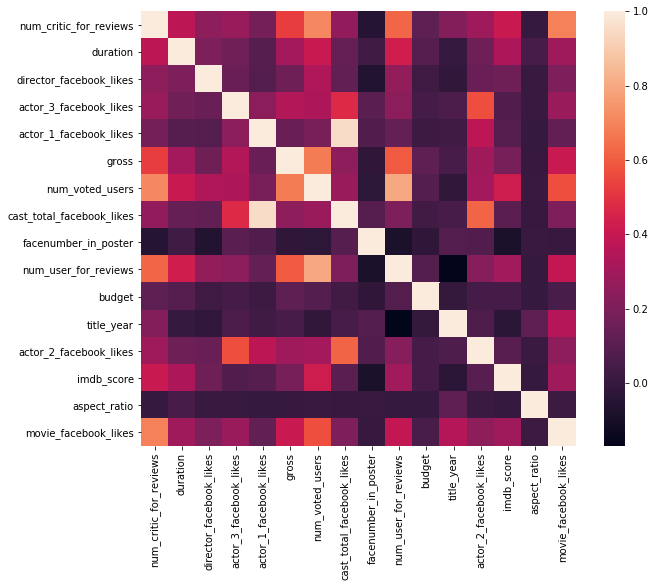

In [207]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(imdb.corr(), vmax=1, square=True)

In [208]:
imdb2 = imdb.dropna(subset=['actor_3_facebook_likes','actor_1_facebook_likes','num_voted_users','cast_total_facebook_likes',
       'num_user_for_reviews','budget','actor_2_facebook_likes','director_facebook_likes','imdb_score',
       'movie_facebook_likes'])

In [209]:
#numeric features
features = imdb[['actor_3_facebook_likes','actor_1_facebook_likes','num_voted_users','cast_total_facebook_likes',
                 'num_user_for_reviews','budget','actor_2_facebook_likes','director_facebook_likes','imdb_score',
                 'movie_facebook_likes']].copy()

In [210]:
target = imdb['gross']

In [211]:
#categorical features
imdb_cat = imdb[['actor_1_name','language','country']]

In [212]:
#filling the missing values
features['actor_3_facebook_likes'].fillna(features['actor_3_facebook_likes'].mean(), inplace=True)
features['actor_1_facebook_likes'].fillna(features['actor_1_facebook_likes'].mean(), inplace=True)
features['cast_total_facebook_likes'].fillna(features['cast_total_facebook_likes'].mean(), inplace=True)
features['actor_2_facebook_likes'].fillna(features['actor_2_facebook_likes'].mean(), inplace=True)
features['director_facebook_likes'].fillna(features['director_facebook_likes'].mean(), inplace=True)
features['movie_facebook_likes'].fillna(features['movie_facebook_likes'].mean(), inplace=True)
features['num_voted_users'].fillna(features['num_voted_users'].mean(), inplace=True)
features['num_user_for_reviews'].fillna(features['num_user_for_reviews'].mean(), inplace=True)
features['imdb_score'].fillna(features['imdb_score'].mean(), inplace=True)
features['budget'].fillna(features['budget'].mean(), inplace=True)


imdb_cat['actor_1_name'].fillna(imdb_cat['actor_1_name'].value_counts().index[0], inplace=True)
imdb_cat['language'].fillna(imdb_cat['actor_1_name'].value_counts().index[0], inplace=True)
imdb_cat['country'].fillna(imdb_cat['actor_1_name'].value_counts().index[0], inplace=True)


/Users/madhuridilipkumar/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [213]:
#Onehot-encoding
dummy = pd.get_dummies(imdb_cat[['actor_1_name','language','country']])

In [214]:
dummy_features = pd.concat([features,dummy], axis=1)

In [215]:
preprocess = make_column_transformer(
    (['actor_3_facebook_likes','actor_1_facebook_likes','num_voted_users','cast_total_facebook_likes',
       'num_user_for_reviews','budget','actor_2_facebook_likes','director_facebook_likes','imdb_score',
       'movie_facebook_likes'], StandardScaler()))

/Users/madhuridilipkumar/anaconda3/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:739: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


In [216]:
preprocess.fit_transform(dummy_features)

/Users/madhuridilipkumar/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/madhuridilipkumar/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 6.93288451e-02, -3.66939844e-01,  6.02668112e+00, ...,
        -2.21810107e-01,  1.42601298e+00,  1.06878026e+00],
       [ 1.46201618e-01,  1.93984370e+00,  2.90635301e+00, ...,
         8.52686446e-04,  7.07625073e-01, -4.27846312e-01],
       [-2.98600149e-01,  2.24543115e-01,  1.43747147e+00, ...,
        -2.21810107e-01,  4.38229608e-01,  3.42710092e+00],
       ...,
       [-3.83955435e-01, -4.26088140e-01, -6.36536456e-01, ...,
        -2.21810107e-01, -1.07628333e-02, -4.27120674e-01],
       [-1.24708636e-01, -3.70133852e-01, -6.27385647e-01, ...,
        -2.21810107e-01, -1.07628333e-02, -3.97913780e-01],
       [-3.75472922e-01, -4.21001387e-01, -6.04602614e-01, ...,
        -2.15482213e-01,  2.58632631e-01, -4.07165654e-01]])

In [217]:
numerical_features_float = (dummy_features.dtypes == 'float')
numerical_features_int = (dummy_features.dtypes == 'int')


In [218]:
#spliting the data to training and testing

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(dummy_features, target, random_state=0)

In [219]:
preprocess_linear = make_column_transformer(
    (make_pipeline(Imputer(), StandardScaler()),numerical_features_float),
    (make_pipeline(Imputer(), StandardScaler()),numerical_features_int))

/Users/madhuridilipkumar/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/madhuridilipkumar/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# LINEAR REGRESSION

In our ﬁrst model, we use standard least-squares linear regression. To do this, we intend to use stochastic gradient descent. Once we have trained a set of feature weights, we could then generate gross revenue predictions as follows:
Gross = θ0+θ1* F1+θ2* F2+ ... + θn* Fn
where θi are the weights, Fi are the features, and n is the number of features.



In [220]:
model_linear = make_pipeline(
    preprocess_linear,
    SGDRegressor()
)

In [221]:
model_linear.fit(X_train_df, y_train_df)
print("Linear score: %f" % model_linear.score(X_test_df, y_test_df))

Linear score: 0.510661


/Users/madhuridilipkumar/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/madhuridilipkumar/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/madhuridilipkumar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol